In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
factors=pdr.DataReader('F-F_Research_Data_Factors_daily','famafrench',start='1980-12-12')[0]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_31144\2584053458.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors=pdr.DataReader('F-F_Research_Data_Factors_daily','famafrench',start='1980-12-12')[0]


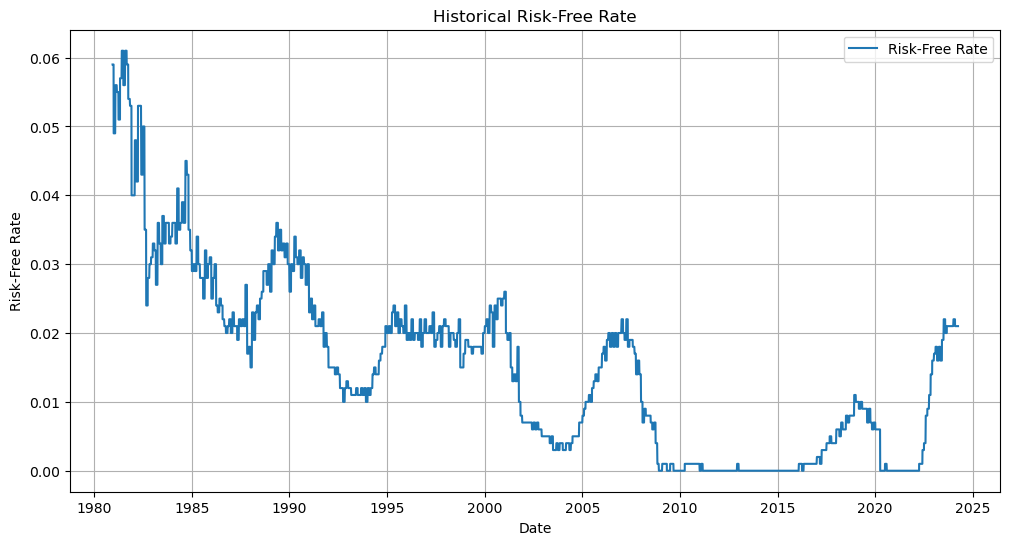

In [3]:
factors.index = pd.to_datetime(factors.index)
risk_free_rate = factors['RF']
plt.figure(figsize=(12, 6))
plt.plot(risk_free_rate, label='Risk-Free Rate')
plt.title('Historical Risk-Free Rate')
plt.xlabel('Date')
plt.ylabel('Risk-Free Rate')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import yfinance as yf
yf.pdr_override()

tickers=['AAPL']
sec_data=pd.DataFrame()
for t in tickers:
	sec_data[t]=pdr.get_data_yahoo(t,start='1980-12-12',end='2024-3-28')['Adj Close']

sec_returns=sec_data.pct_change().dropna()*100

all=pd.merge(sec_returns,factors,left_index=True,right_index=True).dropna()
all.head()

[*********************100%%**********************]  1 of 1 completed


,AAPL,Mkt-RF,SMB,HML,RF
Date,,,,,
1980-12-15,-5.217002,0.11,0.25,-0.46,0.059
1980-12-16,-7.339798,0.71,-0.75,-0.47,0.059
1980-12-17,2.475074,1.52,-0.86,-0.34,0.059
1980-12-18,2.899216,0.41,0.22,1.26,0.059
1980-12-19,6.102927,0.58,0.17,0.59,0.059


In [5]:
all['AAPL-RF'] = all['AAPL'] - all['RF']
X = all[['Mkt-RF']]
X1 = sm.add_constant(X)
reg = sm.OLS(all['AAPL-RF'], X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL-RF   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     3613.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        23:49:41   Log-Likelihood:                -25143.
No. Observations:               10912   AIC:                         5.029e+04
Df Residuals:                   10910   BIC:                         5.030e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0497      0.023      2.143      0.032       0.004       0.095
Mkt-RF         1.2583      0.021     60.112      0.000       1.217       1.299
==============================================================================
Omnibus:                     3242.975   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336832.193
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                      30.208   Cond. No.                         1.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""